In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('deep')

In [2]:
clients_df = pd.read_csv("../data/raw/clients.csv")
products_df = pd.read_csv("../data/raw/products.csv")
purchases_df = pd.read_csv("../data/raw/purchases.csv")

In [3]:
train_df = pd.read_csv("../data/raw/uplift_train.csv")
test_df = pd.read_csv("../data/raw/uplift_test.csv")

In [4]:
clients_df.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U


In [70]:
clients_df[clients_df['client_id']=='000012768d']

,client_id,first_issue_date,first_redeem_date,age,gender,strange_age
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,False


In [5]:
clients_df['gender'].value_counts()

U    185706
F    147649
M     66807
Name: gender, dtype: int64

In [6]:
clients_df.shape

(400162, 5)

In [7]:
clients_df['age'].describe()

count    400162.000000
mean         46.488112
std          43.871218
min       -7491.000000
25%          34.000000
50%          45.000000
75%          59.000000
max        1901.000000
Name: age, dtype: float64

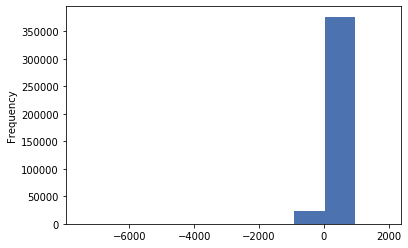

In [8]:
clients_df['age'].plot(kind='hist')

In [9]:
clients_df['age'].quantile(.01), clients_df['age'].quantile(.99)

(17.0, 82.0)

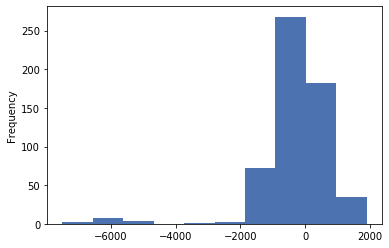

In [10]:
clients_df[(clients_df['age'] < clients_df['age'].quantile(.001)) | (clients_df['age'] > clients_df['age'].quantile(.999))]['age'].plot(kind='hist')

In [11]:
clients_df['strange_age'] = (clients_df['age'] < clients_df['age'].quantile(.01)) | (clients_df['age'] > clients_df['age'].quantile(.99))

In [12]:
clients_df.head()

,client_id,first_issue_date,first_redeem_date,age,gender,strange_age
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,False
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,False
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F,False
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F,False
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U,False


In [13]:
clients_df['client_id'].nunique(), clients_df['client_id'].nunique() == clients_df.shape[0]

(400162, True)

In [14]:
clients_df[clients_df['first_issue_date'].isna()]

,client_id,first_issue_date,first_redeem_date,age,gender,strange_age


In [15]:
clients_df['first_issue_date'] = pd.to_datetime(clients_df['first_issue_date'])

In [16]:
clients_df['first_redeem_date'] = pd.to_datetime(clients_df['first_redeem_date'])

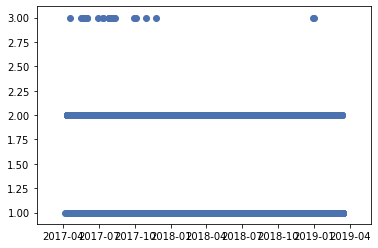

In [17]:
grp = clients_df.groupby('first_issue_date')['client_id'].nunique().reset_index()
plt.scatter(grp['first_issue_date'], grp['client_id'])

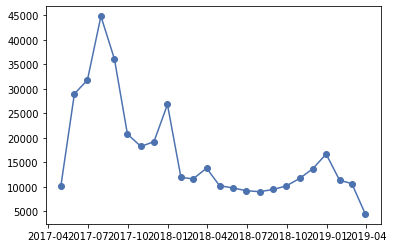

In [18]:
grp = grp.set_index('first_issue_date').resample('M').sum()
plt.plot(grp.index, grp['client_id'], marker='o')

In [19]:
products_df.head()

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0


In [20]:
products_df['product_id'].nunique()

43038

In [21]:
products_df.shape

(43038, 11)

In [22]:
products_df['level_1'].nunique(), products_df['level_2'].nunique(), products_df['level_3'].nunique(), products_df['level_4'].nunique()

(3, 42, 201, 790)

In [23]:
(products_df['level_1'] + products_df['level_2'] + products_df['level_3'] + products_df['level_4']).nunique()

790

In [24]:
products_df['level_1'].value_counts()

e344ab2e71    22183
c3d3a8e8c6    16573
ec62ce61e3     4279
Name: level_1, dtype: int64

In [25]:
products_df[products_df['level_1'].isna()]['level_1']

796      NaN
12219    NaN
17818    NaN
Name: level_1, dtype: object

In [26]:
products_df.loc[[796, 12219, 17818]]

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
796,04d86b4b50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
12219,48cc0e256d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
17818,6a3d708544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [28]:
for i in range(2, 5):
    print(f"level_{i}: {products_df[products_df[f'level_{i}'].isna()][f'level_{i}'].index}")

level_2: Int64Index([796, 12219, 17818], dtype='int64')
level_3: Int64Index([796, 12219, 17818], dtype='int64')
level_4: Int64Index([796, 12219, 17818], dtype='int64')


In [89]:
products_df['segment_id'].nunique()

116

In [77]:
sorted(products_df['segment_id'].unique().tolist())

[1.0,
 9.0,
 35.0,
 37.0,
 40.0,
 43.0,
 45.0,
 48.0,
 69.0,
 70.0,
 75.0,
 80.0,
 85.0,
 92.0,
 102.0,
 105.0,
 110.0,
 111.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 126.0,
 132.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 157.0,
 161.0,
 163.0,
 165.0,
 172.0,
 177.0,
 187.0,
 190.0,
 192.0,
 209.0,
 212.0,
 213.0,
 214.0,
 220.0,
 223.0,
 230.0,
 232.0,
 249.0,
 251.0,
 255.0,
 259.0,
 260.0,
 262.0,
 263.0,
 271.0,
 308.0,
 313.0,
 321.0,
 nan,
 3.0,
 7.0,
 13.0,
 14.0,
 18.0,
 21.0,
 23.0,
 30.0,
 31.0,
 51.0,
 57.0,
 59.0,
 60.0,
 61.0,
 64.0,
 73.0,
 81.0,
 95.0,
 96.0,
 104.0,
 113.0,
 117.0,
 128.0,
 133.0,
 136.0,
 140.0,
 144.0,
 145.0,
 151.0,
 171.0,
 174.0,
 176.0,
 179.0,
 182.0,
 186.0,
 191.0,
 198.0,
 205.0,
 206.0,
 211.0,
 217.0,
 218.0,
 235.0,
 240.0,
 241.0,
 256.0,
 258.0,
 268.0,
 274.0,
 281.0,
 283.0,
 292.0,
 298.0,
 300.0,
 307.0,
 316.0,
 317.0,
 320.0]

In [92]:
products_df.groupby(['level_1'])['segment_id'].nunique()

level_1
c3d3a8e8c6    49
e344ab2e71    61
ec62ce61e3    21
Name: segment_id, dtype: int64

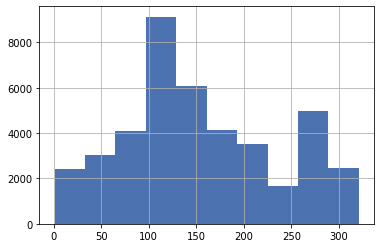

In [96]:
products_df['segment_id'].hist()

In [97]:
products_df['segment_id'].describe()

count    41466.000000
mean       153.918222
std         82.271376
min          1.000000
25%        105.000000
50%        148.000000
75%        214.000000
max        321.000000
Name: segment_id, dtype: float64

In [31]:
products_df[products_df['segment_id'].isna()]['segment_id'].shape[0]

1572

In [35]:
products_df[~products_df['brand_id'].isna()]['brand_id'].head()

0    394a54a7c1
1    acd3dd483f
2    f597581079
3    54a90fe769
4    63417fe1f3
Name: brand_id, dtype: object

In [93]:
products_df['brand_id'].nunique()

4296

In [94]:
products_df.groupby(['level_1'])['brand_id'].nunique()

level_1
c3d3a8e8c6    1565
e344ab2e71    2715
ec62ce61e3     260
Name: brand_id, dtype: int64

In [33]:
products_df[products_df['brand_id'].isna()]['brand_id'].shape[0]

5200

In [36]:
products_df[~products_df['vendor_id'].isna()]['vendor_id'].head()

0    9eaff48661
1    10486c3cf0
2    764e660dda
3    03c2d70bad
4    f329130198
Name: vendor_id, dtype: object

In [98]:
products_df['vendor_id'].nunique()

3193

In [99]:
products_df.groupby(['level_1'])['vendor_id'].nunique()

level_1
c3d3a8e8c6    1344
e344ab2e71    1742
ec62ce61e3     330
Name: vendor_id, dtype: int64

In [34]:
products_df[products_df['vendor_id'].isna()]['vendor_id'].shape[0]

34

In [38]:
products_df.loc[products_df[products_df['vendor_id'].isna()]['vendor_id'].index]

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
702,0455f05e64,e344ab2e71,703f4b6eb0,0d718a4e3b,130359c47f,259.0,3b48854ca9,NaN,0.140,0,0
796,04d86b4b50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1026,06453d1fa6,c3d3a8e8c6,ad2b2e17d2,ca69ed9de2,0736b62d31,157.0,4da2dc345f,NaN,0.200,0,0
1287,07b15f90c9,c3d3a8e8c6,fb84f08028,4603fa9fa5,f68966aaae,105.0,4da2dc345f,NaN,0.090,0,0
2517,0ee9c0b2d8,c3d3a8e8c6,428e08386e,e92017d246,cfd50afe18,105.0,4da2dc345f,NaN,0.115,0,0
3195,12da0599cf,c3d3a8e8c6,ad2b2e17d2,ca69ed9de2,3d648097f6,85.0,4cbf4b50ea,NaN,0.500,0,0
4011,17afcd062b,e344ab2e71,14d373dff5,39532a0f6f,16341715da,92.0,7975b3d6f8,NaN,1.500,0,0
6627,271fe85179,e344ab2e71,52f13dac0c,3a80a917a4,98cdc326b3,110.0,4da2dc345f,NaN,0.400,0,0
6962,290901c4de,e344ab2e71,52f13dac0c,38816369ce,4d4b7e1f16,105.0,4da2dc345f,NaN,0.380,0,0
10913,40b4801936,e344ab2e71,14d373dff5,39532a0f6f,16341715da,92.0,82e314e982,NaN,1.500,0,0


In [101]:
products_df['netto'].describe()

count    43035.000000
mean         0.536966
std          8.274367
min          0.000000
25%          0.150000
50%          0.300000
75%          0.500000
max       1150.000000
Name: netto, dtype: float64

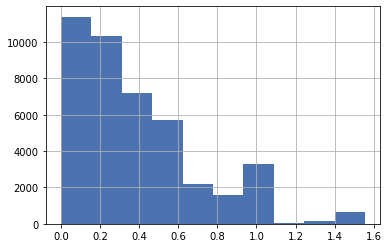

In [102]:
products_df[products_df['netto'] < products_df['netto'].quantile(.99)]['netto'].hist()

In [39]:
products_df[products_df['netto'].isna()]['netto']

796     NaN
12219   NaN
17818   NaN
Name: netto, dtype: float64

In [104]:
products_df['is_own_trademark'].value_counts()

0    41524
1     1514
Name: is_own_trademark, dtype: int64

In [40]:
products_df[products_df['is_own_trademark'].isna()]['is_own_trademark']

Series([], Name: is_own_trademark, dtype: int64)

In [105]:
products_df['is_alcohol'].value_counts()

0    40645
1     2393
Name: is_alcohol, dtype: int64

In [107]:
products_df.groupby('level_1')['is_alcohol'].sum()

level_1
c3d3a8e8c6       0
e344ab2e71    2393
ec62ce61e3       0
Name: is_alcohol, dtype: int64

In [114]:
grp = products_df.groupby('segment_id')['is_alcohol'].sum()
grp[grp > 0]

segment_id
61.0      59
117.0    247
136.0    100
165.0    243
174.0     44
186.0     34
190.0    643
218.0    153
240.0     21
321.0    848
Name: is_alcohol, dtype: int64

In [6]:
purchases_df.head()

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


In [115]:
purchases_df.shape

(45786568, 13)

In [41]:
purchases_df[purchases_df['client_id'].isna()]['client_id']

Series([], Name: client_id, dtype: object)

In [42]:
purchases_df[purchases_df['transaction_id'].isna()]['transaction_id']

Series([], Name: transaction_id, dtype: object)

In [43]:
purchases_df[purchases_df['regular_points_received'].isna()]['regular_points_received']

Series([], Name: regular_points_received, dtype: float64)

In [44]:
purchases_df['regular_points_received'].unique()

array([ 10. ,   5.7,   8. , ..., 177.4, 160.6, 470.3])

In [45]:
purchases_df[purchases_df['express_points_received'].isna()]['express_points_received']

Series([], Name: express_points_received, dtype: float64)

In [48]:
purchases_df['express_points_received'].astype(int).unique()

array([  0,  60,  20,  30,  15, 100,   5,  40,  10,  25, 300,  35,  50],
      dtype=int64)

In [49]:
purchases_df[purchases_df['regular_points_spent'].isna()]['regular_points_spent']

Series([], Name: regular_points_spent, dtype: float64)

In [58]:
purchases_df[purchases_df['express_points_spent'].isna()]['express_points_spent']

Series([], Name: express_points_spent, dtype: float64)

In [59]:
purchases_df['express_points_spent'].unique()

array([   0.,  -30.,  -10.,  -20.,  -50.,   -4.,  -29.,   -7.,  -19.,
        -60.,  -15.,  -35.,  -39.,  -11.,   -6.,   -5.,  -17.,   -8.,
        -25.,  -13.,  -21.,   -9.,  -24.,  -44.,  -26.,  -12.,  -28.,
        -18.,  -31.,  -49.,  -38.,  -14.,  -33.,  -27.,   -1.,  -47.,
        -46.,  -23.,  -34.,   -3.,  -22.,  -37.,   -2.,  -71.,  -32.,
        -16.,  -45.,  -42., -100.,  -40.,  -54., -300., -298.,  -63.,
        -59.,  -53.,  -36.,  -43.,  -41.,  -48., -289.,  -90.,  -55.,
        -80., -130.,  -81.,  -57.,  -70., -119., -181.,  -85.,  -88.,
       -110.,  -56.,  -58.,  -61.,  -79.,  -83.])

In [60]:
purchases_df[purchases_df['purchase_sum'].isna()]['purchase_sum']

Series([], Name: purchase_sum, dtype: float64)

In [62]:
purchases_df[purchases_df['product_quantity'].isna()]['product_quantity']

Series([], Name: product_quantity, dtype: float64)

In [64]:
purchases_df[purchases_df['trn_sum_from_iss'].isna()]['trn_sum_from_iss']

Series([], Name: trn_sum_from_iss, dtype: float64)

In [67]:
purchases_df['trn_sum_from_iss'].dtype

dtype('float64')

In [117]:
purchases_df['transaction_datetime'] = pd.to_datetime(purchases_df['transaction_datetime'])
purchases_df['transaction_date'] = purchases_df['transaction_datetime'].dt.date

In [118]:
purchases_df['transaction_date'].min(), purchases_df['transaction_date'].max()

(datetime.date(2018, 11, 21), datetime.date(2019, 3, 18))

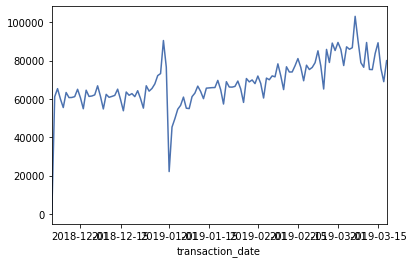

In [119]:
purchases_df.groupby('transaction_date')['transaction_id'].nunique().plot()

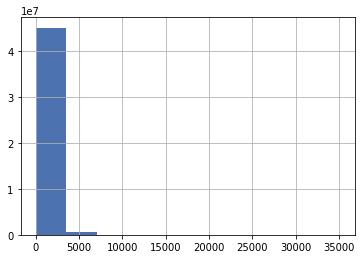

In [120]:
purchases_df['purchase_sum'].hist()

In [123]:
purchases_df['purchase_sum'].describe()

count    4.578657e+07
mean     7.775215e+02
std      7.965350e+02
min      0.000000e+00
25%      2.860000e+02
50%      5.390000e+02
75%      9.760000e+02
max      3.514904e+04
Name: purchase_sum, dtype: float64

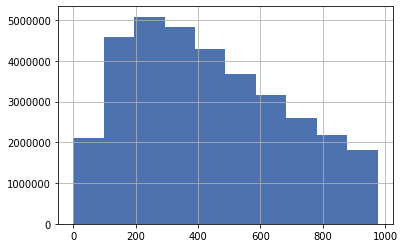

In [130]:
purchases_df[purchases_df['purchase_sum'] <= 976]['purchase_sum'].hist()

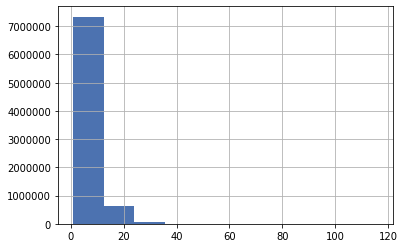

In [126]:
purchases_df.groupby('transaction_id')['product_id'].nunique().hist()

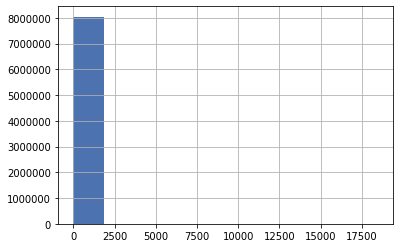

In [127]:
purchases_df.groupby('transaction_id')['product_quantity'].sum().hist()

In [131]:
purchases_df['store_id'].nunique()

13882

In [134]:
purchases_df['transaction_month'] = purchases_df['transaction_datetime'].dt.month

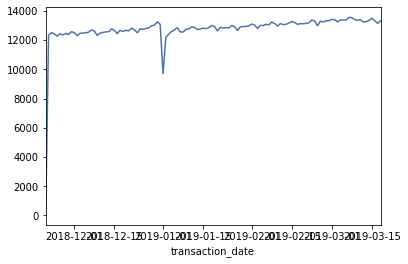

In [132]:
purchases_df.groupby('transaction_date')['store_id'].nunique().plot()

In [135]:
purchases_df.groupby('transaction_month')['store_id'].nunique()

transaction_month
1     13639
2     13757
3     13804
11    13184
12    13512
Name: store_id, dtype: int64

In [7]:
train_df.head()

,client_id,treatment_flg,target
0,000012768d,0,1
1,000036f903,1,1
2,00010925a5,1,1
3,0001f552b0,1,1
4,00020e7b18,1,1


In [8]:
test_df.head()

,client_id
0,000048b7a6
1,000073194a
2,00007c7133
3,00007f9014
4,0000a90cf7
